#### Import Clean Dataset

In [16]:
import pandas as pd

df = pd.read_csv("data/clean_dataset_googleplaystore.csv")

df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,GenrePrincipal,Last Updated,codeCategory,GenreSecondaire
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,0.0,0,0,2018-01-07,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,0.0,0,0,2018-01-15,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0.0,0,0,2018-08-01,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0.0,1,0,2018-06-08,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,0.0,0,0,2018-06-20,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7724,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619000,1000,0.0,0,3,2014-03-23,3,0
7725,FR Calculator,FAMILY,4.0,7.0,2600000,500,0.0,0,8,2017-06-18,18,0
7726,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000,5000,0.0,0,8,2017-07-25,18,0
7727,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000,100,0.0,0,8,2018-07-06,18,0


In [19]:
# Normalisation
from sklearn.preprocessing import StandardScaler

clustering_columns_price = ["Rating", "Reviews", "Installs", "Price"]
df_normalized_price = StandardScaler().fit_transform(df[clustering_columns_price])

clustering_columns_category = ["Rating", "Reviews", "Installs", "codeCategory"]
df_normalized_category = StandardScaler().fit_transform(df[clustering_columns_category])

c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

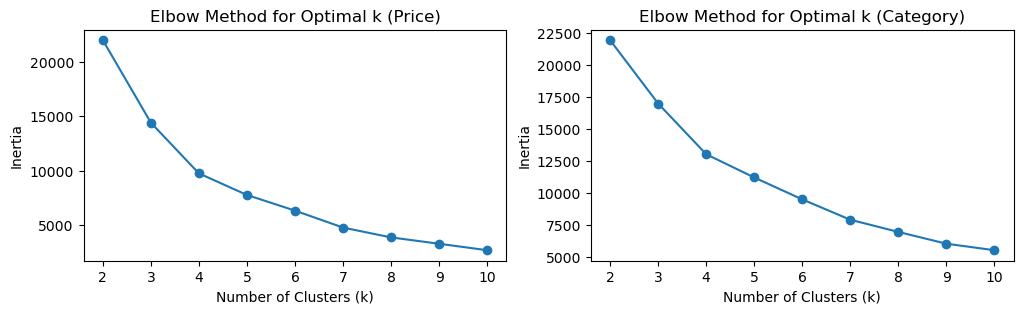

In [32]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exploring a range of cluster numbers from 2 to 10
inertia_price = []
inertia_category = []
for k in range(2, 11):
    kmeans_price = KMeans(n_clusters=k, random_state=42)
    kmeans_price.fit(df_normalized_price)
    inertia_price.append(kmeans_price.inertia_)

    kmeans_category = KMeans(n_clusters=k, random_state=42)
    kmeans_category.fit(df_normalized_category)
    inertia_category.append(kmeans_category.inertia_)

# Plot the elbow graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(range(2, 11), inertia_price, marker='o')
axes[0].set(xlabel='Number of Clusters (k)', ylabel='Inertia')
axes[0].set_title('Elbow Method for Optimal k (Price)')

axes[1].plot(range(2, 11), inertia_category, marker='o')
axes[1].set(xlabel='Number of Clusters (k)', ylabel='Inertia')
axes[1].set_title('Elbow Method for Optimal k (Category)')
plt.show()

c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


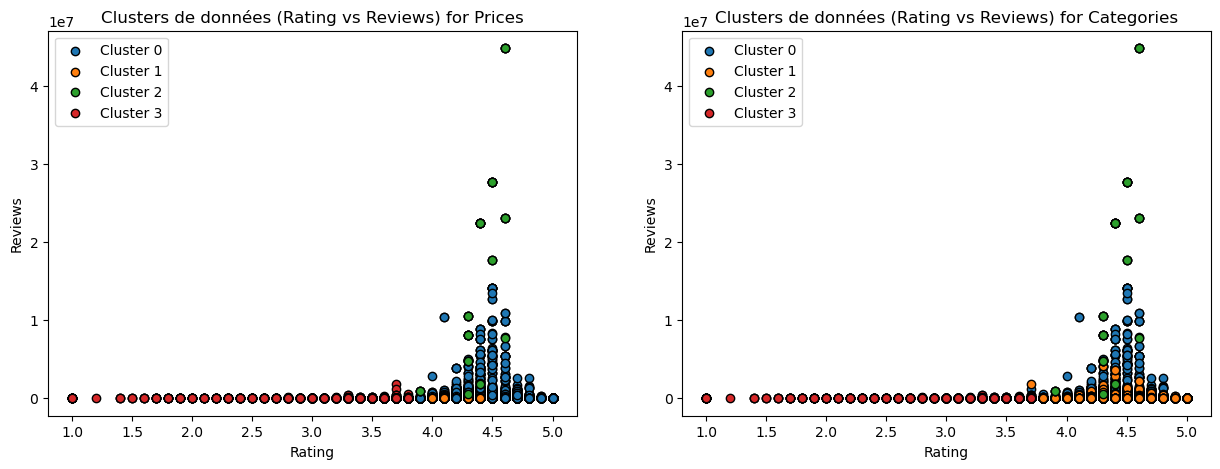

In [138]:
# Select k based on the elbow
k_price = 4
k_category = 4

# Apply K-Means clustering
kmeans_price = KMeans(n_clusters=k_price)
clusters_price = kmeans_price.fit(df_normalized_price)
df["ClusterPrice"] = kmeans_price.labels_

kmeans_category = KMeans(n_clusters=k_category)
clusters_category = kmeans_category.fit(df_normalized_category)
df["ClusterCategory"] = kmeans_category.labels_

# Affichage des clusters selon feature1 et feature2
feature1 = "Rating"
feature2 = "Reviews"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for cluster in range(k_price):
    cluster_data = df[df["ClusterPrice"] == cluster]
    axes[0].scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}', edgecolors='k')

axes[0].set(xlabel=feature1, ylabel=feature2)
axes[0].set_title(f'Clusters de données ({feature1} vs {feature2}) for Prices')
axes[0].legend()

for cluster in range(k_category):
    cluster_data = df[df["ClusterCategory"] == cluster]
    axes[1].scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}', edgecolors='k')
axes[1].set(xlabel=feature1, ylabel=feature2)
axes[1].set_title(f'Clusters de données ({feature1} vs {feature2}) for Categories')
axes[1].legend()
plt.show()

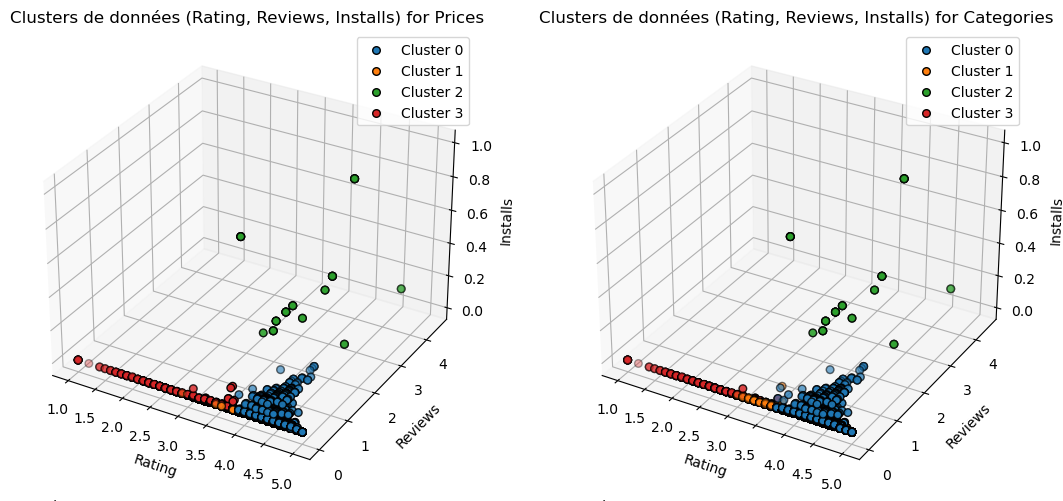

In [139]:
# Affichage en 3D avec feature1, 2 et 3
fig = plt.figure(figsize=(13, 8))

feature3 = "Installs"

ax = fig.add_subplot(1, 2, 1, projection='3d')

for cluster in range(k_price):
    cluster_data = df[df["ClusterPrice"] == cluster]
    ax.scatter(cluster_data[feature1], cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}', edgecolors='k', s=30)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title(f'Clusters de données ({feature1}, {feature2}, {feature3}) for Prices')
plt.legend()


ax = fig.add_subplot(1, 2, 2, projection='3d')

for cluster in range(k_category):
    cluster_data = df[df["ClusterCategory"] == cluster]
    ax.scatter(cluster_data[feature1], cluster_data[feature2], cluster_data[feature3], label=f'Cluster {cluster}', edgecolors='k', s=30)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title(f'Clusters de données ({feature1}, {feature2}, {feature3}) for Categories')
plt.legend()
plt.show()

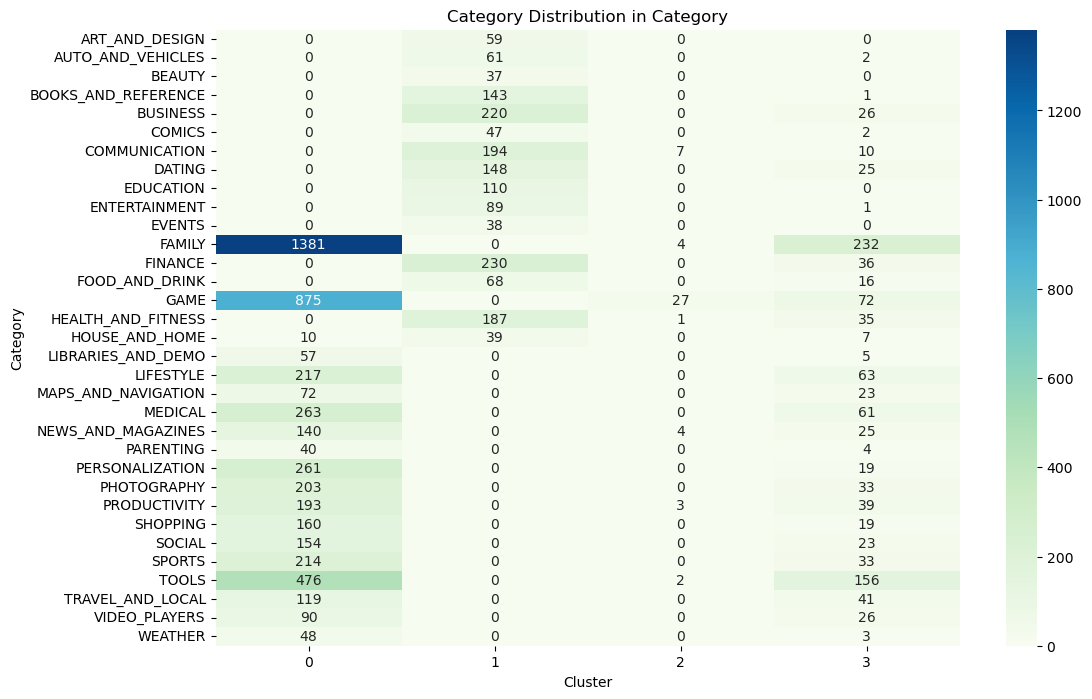

In [140]:
# Heatmap des catégarie selon les clusters (pas très utile)
import seaborn as sns

feature = "Category"

category_cluster_counts = df.groupby([feature, 'ClusterCategory']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
heatmap_data = category_cluster_counts.pivot_table(index=feature, columns='ClusterCategory', values='count', fill_value=0)
sns.heatmap(heatmap_data, cmap='GnBu', annot=True, fmt='g')
plt.title(f'Category Distribution in {feature}')
plt.xlabel('Cluster')
plt.ylabel(feature)
plt.show()


In [141]:
# Centroïdes des clusters
centroids_price = df[["Rating", "Reviews", "Installs", "ClusterPrice"]].groupby('ClusterPrice').mean()
centroids_category = df[["Rating", "Reviews", "Installs", "ClusterCategory"]].groupby('ClusterCategory').mean()

print(centroids_price)
print(centroids_category)

                Rating       Reviews      Installs
ClusterPrice                                      
0             4.378053  2.381361e+05  6.090760e+06
1             3.866667  6.032667e+02  1.460667e+04
2             4.387500  1.632271e+07  5.375000e+08
3             3.301986  1.106327e+04  1.000814e+06
                   Rating       Reviews      Installs
ClusterCategory                                      
0                4.347316  2.772946e+05  6.847393e+06
1                4.294251  6.439931e+04  2.694921e+06
2                4.387500  1.632271e+07  5.375000e+08
3                3.139210  7.226743e+03  6.821388e+05


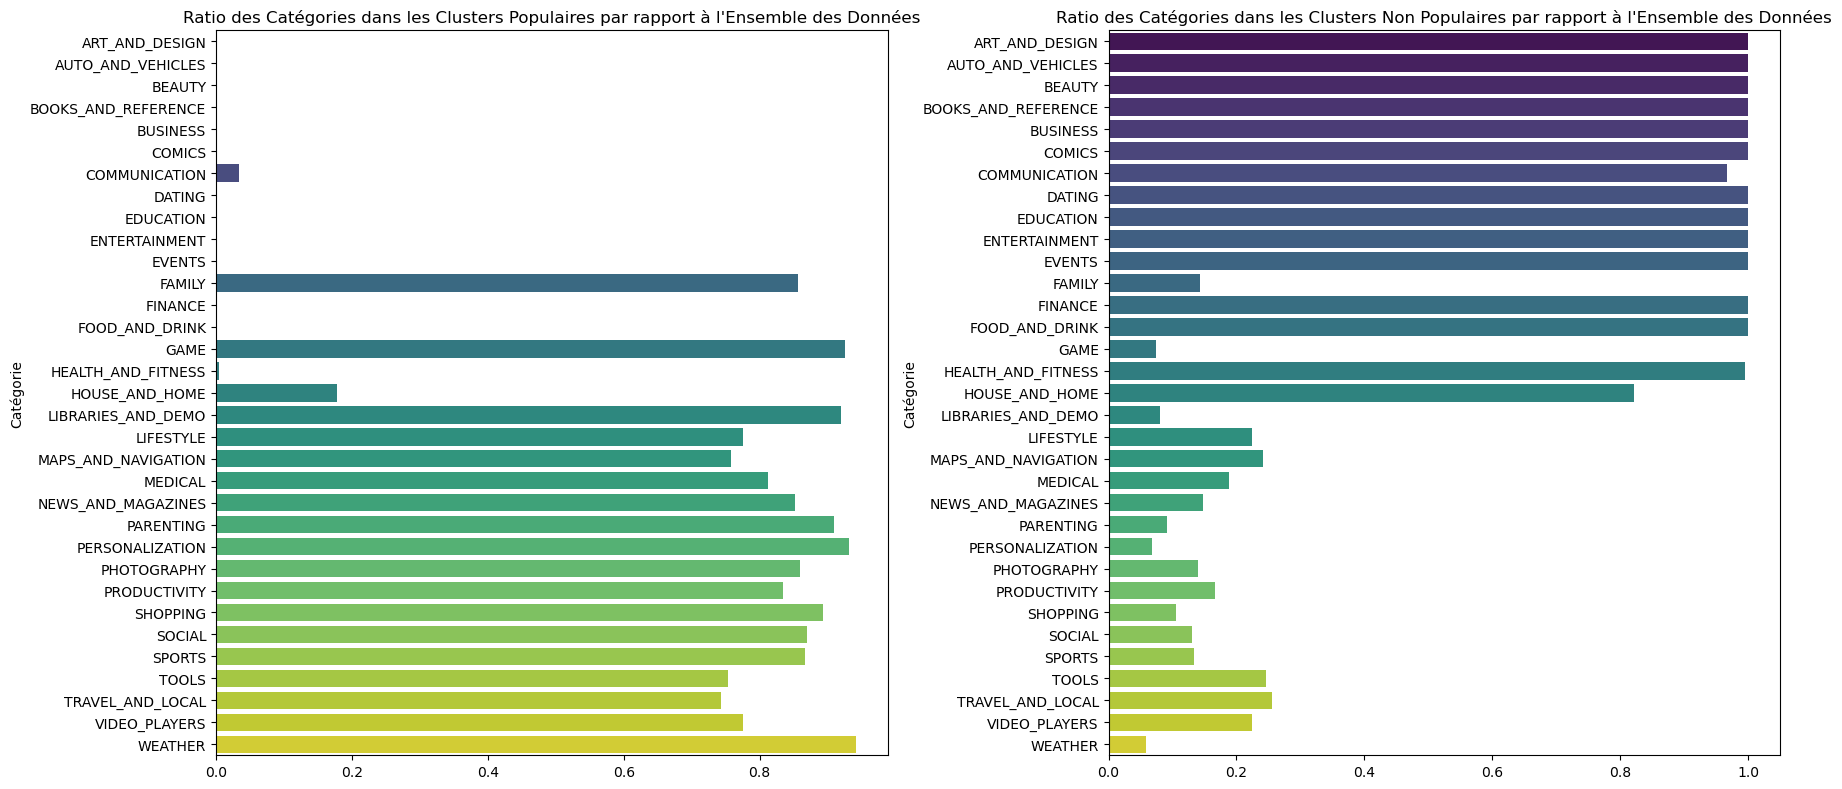

In [164]:
import seaborn as sns

# Créer un sous-ensemble de données pour les clusters
successful_clusters = df[df['ClusterCategory'].isin([0, 2])]
unsuccessful_clusters = df[df['ClusterCategory'].isin([1, 3])]


# Calculer la fréquence des catégories dans l'ensemble des données
category_frequencies_overall = df['Category'].value_counts()

# Calculer la fréquence des catégories dans les clusters populaires et non populaires
category_frequencies_successful = successful_clusters['Category'].value_counts()
category_frequencies_unsuccessful = unsuccessful_clusters['Category'].value_counts()

# Calculer le ratio des catégories dans les clusters par rapport à l'ensemble des données
category_ratio_successful = category_frequencies_successful / category_frequencies_overall
category_ratio_unsuccessful = category_frequencies_unsuccessful / category_frequencies_overall

# Tracer un histo pour visualiser le ratio des catégories
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=category_ratio_successful.values, y=category_ratio_successful.index, palette='viridis')
plt.ylabel('Catégorie')
plt.title('Ratio des Catégories dans les Clusters Populaires par rapport à l\'Ensemble des Données')

plt.subplot(1, 2, 2)
sns.barplot(x=category_ratio_unsuccessful.values, y=category_ratio_unsuccessful.index, palette='viridis')
plt.ylabel('Catégorie')
plt.title('Ratio des Catégories dans les Clusters Non Populaires par rapport à l\'Ensemble des Données')

plt.tight_layout()
plt.show()


In [165]:
# Calculer le pourcentage d'applications payantes dans l'ensemble des données
percentage_paid_overall = (df['Price'] > 0).mean() * 100

successful_clusters = df[df['ClusterPrice'].isin([0, 2])]
unsuccessful_clusters = df[df['ClusterPrice'].isin([1, 3])]

# Calculer le pourcentage d'applications payantes dans les clusters populaires et non populaires
percentage_paid_successful = (successful_clusters['Price'] > 0).mean() * 100
percentage_paid_unsuccessful = (unsuccessful_clusters['Price'] > 0).mean() * 100

# Afficher le pourcentage d'applications payantes
print(f"Pourcentage d'applications payantes dans l'ensemble des données : {percentage_paid_overall:.2f}%")
print(f"Pourcentage d'applications payantes dans les clusters populaires : {percentage_paid_successful:.2f}%")
print(f"Pourcentage d'applications payantes dans les clusters non populaires : {percentage_paid_unsuccessful:.2f}%")


Pourcentage d'applications payantes dans l'ensemble des données : 7.49%
Pourcentage d'applications payantes dans les clusters populaires : 7.55%
Pourcentage d'applications payantes dans les clusters non populaires : 7.25%
